In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [5]:
df.shape

(150, 4)

In [6]:
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [13]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'sepal width (cm)')

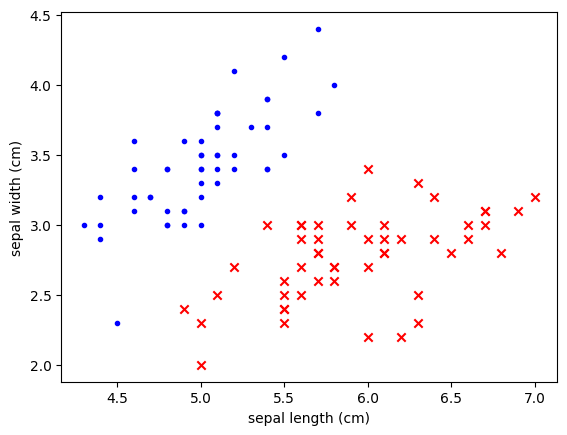

In [16]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue', label='0', marker='.')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', label='1', marker='x')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

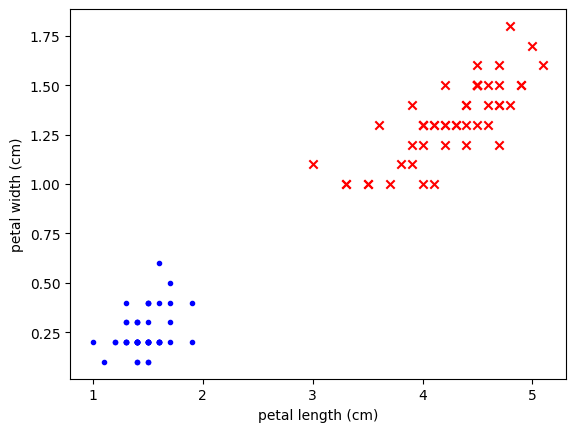

In [12]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='blue', label='0', marker='.')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', label='1', marker='x')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['target'], axis='columns')
y = df.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
len(X_train)

120

In [26]:
len(X_test)

30

In [29]:
from sklearn.svm import SVC

model = SVC(C=10)

In [30]:
model.fit(X_train, y_train)

SVC(C=10)

In [31]:
model.score(X_test, y_test)

0.9666666666666667

In [33]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

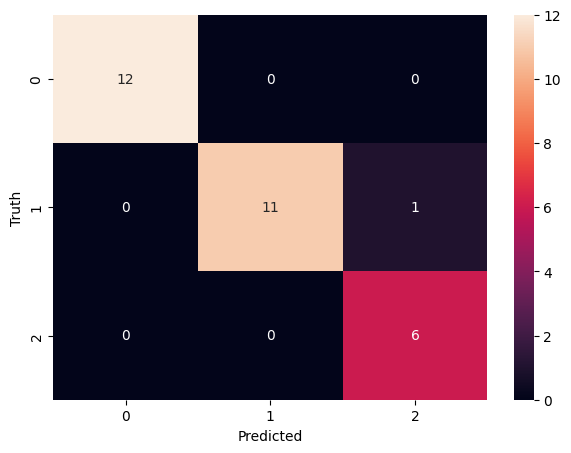

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        12
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

